# Gather Data

In [319]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import re
import os

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)



### Upload 'twitter-archive-enhanced.csv' into a Pandas DataFrame

In [320]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [321]:
df_archive.shape

(2356, 17)

### Download image_predictions.tsv using the Request Library

In [322]:
response=requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response.status_code

200

In [323]:
with open("image_predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [324]:
df_images_predictions = pd.read_csv("image_predictions.tsv", sep='\t')
df_images_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [325]:
df_images_predictions.shape

(2075, 12)

In [326]:
#!pip install -U seaborn

In [327]:
#!pip install -U pandas

In [328]:
#!pip install -U numpy

In [329]:
#!pip install -U matplotlib

In [330]:
!pip install -U tweepy==4.0

Requirement already up-to-date: tweepy==4.0 in /opt/conda/lib/python3.6/site-packages (4.0.0)


In [331]:
#consumer_key = ""
#consumer_secret = ""
#auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True)

In [332]:
tweet_ids = df_archive.tweet_id.values


### Query each tweet's retweet count and favorite count using the Tweepy Library and stored the data in 'tweet_json.txt'

### Read the 'tweet_json.txt' line by line onto Pandas DataFrame with id, retweet count, and favorite count.

In [333]:
json_df = pd.read_json("tweet_json.txt", lines=True , encoding="utf-8")
json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9377824, 'friends_count': 20, 'listed_count': 7850, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147767, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17393...",NaN,NaN,NaN,NaN,False,6902,32972,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DG

In [334]:
 json_df = json_df[['id', 'favorite_count', 'retweet_count']]

In [335]:
json_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,32972,6902
1,892177421306343426,28517,5201
2,891815181378084864,21437,3433
3,891689557279858688,35952,7109
4,891327558926688256,34376,7637


In [336]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              291 non-null    int64
 1   favorite_count  291 non-null    int64
 2   retweet_count   291 non-null    int64
dtypes: int64(3)
memory usage: 6.9 KB


In [337]:
json_df.rename(columns={'id':'tweet_id'}) #change column name from 'id' to 'tweet_id' for ease of merging tables later.

,tweet_id,favorite_count,retweet_count
0,892420643555336193,32972,6902
1,892177421306343426,28517,5201
2,891815181378084864,21437,3433
3,891689557279858688,35952,7109
4,891327558926688256,34376,7637
...,...,...,...
286,836397794269200385,0,24734
287,836380477523124226,13537,2709
288,836260088725786625,19434,3924
289,836001077879255040,17463,3844


# Assessing Data
## Visual Assessment

In [338]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [339]:
print(df_archive.loc[45]) #Bella is given a 13.5/10 in text, but a 5/10 in numerator/demoninator columns

tweet_id                                                                                                                                            883482846933004288
in_reply_to_status_id                                                                                                                                              NaN
in_reply_to_user_id                                                                                                                                                NaN
timestamp                                                                                                                                    2017-07-08 00:28:19 +0000
source                                                                              <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt94

In [340]:
print(df_archive.loc[2335]) #rating on this one is incorrect. Text says "9/10" but rating given is 1/2

tweet_id                                                                                                                                            666287406224695296
in_reply_to_status_id                                                                                                                                              NaN
in_reply_to_user_id                                                                                                                                                NaN
timestamp                                                                                                                                    2015-11-16 16:11:11 +0000
source                                                                              <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwL

In [341]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [342]:
df_archive[df_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
mad              2
not              2
getting          2
actually         2
by               1
this             1
space            1
his              1
light            1
officially       1
unacceptable     1
incredibly       1
my               1
infuriating      1
life             1
old              1
all              1
such             1
Name: name, dtype: int64

In [343]:
df_images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [344]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              291 non-null    int64
 1   favorite_count  291 non-null    int64
 2   retweet_count   291 non-null    int64
dtypes: int64(3)
memory usage: 6.9 KB


In [345]:
df_archive.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [346]:
df_archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Kulet        1
Aja          1
Tom          1
Tebow        1
Traviss      1
Name: name, Length: 957, dtype: int64

In [347]:
json_df['favorite_count'].sort_values(ascending=True)

290         0
218         0
258         0
257         0
73          0
        ...  
76      67551
110     71587
161     78666
65      90663
128    106152
Name: favorite_count, Length: 291, dtype: int64

## Quality
#### Df_archive
- Several columns with NaN values
- Tweet id "883482846933004288" and "666287406224695296" incorrectly rated in rating_numerator/rating_denomitator column
- Entries in the name column that are not dog names
- some ratings are missing dog stages ("796080075804475393" should be labeled 'floof')
- 'timestamp' column is an object and not a datetime
- Some ratings contain decimal values



#### df_image_predictions
- id "666268910803644416", "667806454573760512", and "667866724293877760" are incorrectly predicted as "desktop_computer", "toy shop", and "jigsaw puzzle"
- not all dog breed entries are capitalized


## Tidiness
#### Df_archive
- data is found in three separate data sets. These datasets should be joined.
- 'text' column contains twitter URL.
- separate dog stage columns create a lot of Nan values.

# Clean
### make clean copies of the data

In [348]:
df_archive_clean = df_archive.copy()

In [349]:
df_images_predictions_clean = df_images_predictions.copy()

In [350]:
json_df_clean = json_df.copy()

In [351]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


# Quality Issue #1
## Define
#### Remove rows with retweet data by converting null values in the 'retweet_status_id' column to 0 with .fillna(), then sort out all of the id's greater than 0, leaving us with only columns with no retweet status. 

### Code

In [352]:
df_archive_clean['retweeted_status_id'] = df_archive_clean['retweeted_status_id'].fillna(0) 

### Test

In [353]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,0.0,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",0.0,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,0.0,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,0.0,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",0.0,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Code: remove columns containing retweet data

In [354]:
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'] <= 0.0] #remove info referring to retweets

### Test

In [355]:
df_archive_clean.info() # test code to make sure retweet columns were removed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         2175 non-null   float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [356]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,0.0,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",0.0,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,0.0,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,0.0,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",0.0,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [357]:
df_archive_clean = df_archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']) #drop remaining columns to do with retweets as they are irrelevant

In [358]:
df_archive_clean = df_archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'])

In [359]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [360]:
json_df_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,32972,6902
1,892177421306343426,28517,5201
2,891815181378084864,21437,3433
3,891689557279858688,35952,7109
4,891327558926688256,34376,7637


## Tidiness Issue #1
### Merge dataframes for ease of access

In [361]:
df_merge = df_archive_clean.merge(df_images_predictions_clean, how = 'left', left_on='tweet_id', right_on='tweet_id') #merge dataframes together for ease of access

In [362]:
df_merge = df_merge.merge(json_df_clean, how = 'left', left_on='tweet_id', right_on='id')

In [363]:
df_merge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,32972.0,6902.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,28517.0,5201.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,21437.0,3433.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,35952.0,7109.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,34376.0,7637.0


In [364]:
#df_merge.to_csv(index=False)

## Quality Issue #2
### Define
#### replace incorrect name values in name column with 'none'

### Code

In [365]:
not_name = df_merge['name'].str.contains('^[a-z]', regex = True)

In [366]:
df_merge['name'].replace(to_replace = '^[a-z]', value = 'none', regex = True, inplace = True)

In [367]:
df_merge['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2170        None
2171        none
2172        none
2173        none
2174        None
Name: name, Length: 2175, dtype: object

### Test: Make sure erroneous names have been removed

In [368]:
'a' in df_merge['name'].unique()


False

In [369]:
'an' in df_merge['name'].unique()

False

In [370]:
'his' in df_merge['name']

False

## Quality Issue #3
### Define
#### Replace incorrect rating at index 42 (for tweet_id 883482846933004288)

### Code

In [371]:
df_merge.at[42, 'rating_numerator'] = 13.5


In [372]:
df_merge.at[42, 'rating_numerator']

13

### Test: Make sure correct rating was input

In [373]:
df_merge.loc[df_merge['tweet_id'] == 883482846933004288]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
42,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13,10,Bella,None,None,None,None,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,8.834828e+17,39128.0,8124.0


## Quality Issue #4
### Define
#### Replace incorrect rating numerator and denominator at index 2154

### Code

In [374]:
df_merge.loc[df_merge['tweet_id']== 666287406224695296] # get index to fix rating numerator/denominator.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
2154,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,nonen,None,None,None,None,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,NaN,NaN,NaN


In [375]:
df_merge.at[2154, 'rating_numerator'] = 9

In [376]:
df_merge.at[2154, 'rating_denominator'] = 10

### Test: make sure that the rating was fixed.

In [377]:
df_merge.loc[df_merge['tweet_id']== 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
2154,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,nonen,None,None,None,None,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,NaN,NaN,NaN


## Quality Issue #5
### Define
#### Include 'floofer' qualification for tweet_id 796080075804475393

### Code

In [378]:
df_merge.loc[df_merge['tweet_id'] == 796080075804475393] #get index to add "floofer" qualification.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
500,796080075804475393,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,https://twitter.com/dog_rates/status/796080075804475393/photo/1,12,10,Yogi,None,None,None,None,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1.0,chow,0.973846,True,Tibetan_mastiff,0.01411,True,gibbon,0.002358,False,NaN,NaN,NaN


In [379]:
df_merge.at[500, 'floofer' ] = 'floofer'

### Test

In [380]:
df_merge.loc[df_merge['tweet_id'] == 796080075804475393]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
500,796080075804475393,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,https://twitter.com/dog_rates/status/796080075804475393/photo/1,12,10,Yogi,None,floofer,None,None,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1.0,chow,0.973846,True,Tibetan_mastiff,0.01411,True,gibbon,0.002358,False,NaN,NaN,NaN


## Quality Issue #6
### Define
#### change 'timestamp' to a datetime object

### Code

In [381]:
df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'])

### Test

In [382]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
 12  jpg_url             1994 non-null 

## Quality Issue # 7
### Define
#### Create a 'ratings' series in order to properly extract the rating from the 'text' column. Convert the ratings to floats in order to capture decimal values. Upload these corrected ratings into df_merge.

### Code

In [383]:
ratings = df_merge.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand = True)

In [384]:
ratings = ratings.astype('float')

In [385]:
ratings.head()

,0,1
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0


In [386]:
df_merge['rating_numerator'] = ratings[0] # change values in df_merge to the corrected float values from 'ratings'

In [387]:
df_merge['rating_denominator'] = ratings[1]

### Test

In [388]:
df_merge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,32972.0,6902.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,28517.0,5201.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,21437.0,3433.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,35952.0,7109.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,34376.0,7637.0


## Quality Issue #8
### Define
#### Standardize capitalization of dog breeds in the p1, p2, and p3 columns

### Code

In [389]:
df_merge['p1'] = df_merge['p1'].str.upper()

In [390]:
df_merge['p2'] = df_merge['p2'].str.upper()

In [391]:
df_merge['p3'] = df_merge['p3'].str.upper()

### Test

In [392]:
df_merge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,ORANGE,0.097049,False,BAGEL,0.085851,False,BANANA,0.076110,False,8.924206e+17,32972.0,6902.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,CHIHUAHUA,0.323581,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True,8.921774e+17,28517.0,5201.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,CHIHUAHUA,0.716012,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True,8.918152e+17,21437.0,3433.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,PAPER_TOWEL,0.170278,False,LABRADOR_RETRIEVER,0.168086,True,SPATULA,0.040836,False,8.916896e+17,35952.0,7109.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,BASSET,0.555712,True,ENGLISH_SPRINGER,0.225770,True,GERMAN_SHORT-HAIRED_POINTER,0.175219,True,8.913276e+17,34376.0,7637.0


## Tidiness Issue #2

### Define
#### combine all dog type columns into one column. Use .fillna() to de-clutter.

### Code

In [393]:
df_merge = df_merge.replace('None', np.NaN) #convert 'None' values to NaN for future cleaning

In [394]:
df_merge['dog_type'] = df_merge[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').agg(' '.join, axis=1) 

In [395]:
df_merge['dog_type'] = df_merge['dog_type'].map(lambda x: x.strip()) # to get rid of white space

### Test

In [396]:
df_merge['dog_type'].value_counts()

                 1830
pupper            224
doggo              75
puppo              24
doggo  pupper      10
floofer            10
doggo   puppo       1
doggo floofer       1
Name: dog_type, dtype: int64

In [397]:
df_merge['dog_type'].replace('', 'None', inplace=True) #replace blank space with 'None' for clarity

In [398]:
df_merge['dog_type']

0       None
1       None
2       None
3       None
4       None
        ... 
2170    None
2171    None
2172    None
2173    None
2174    None
Name: dog_type, Length: 2175, dtype: object

### Define
####  remove records that do not have a corresponding photo

### Code

In [399]:
df_merge.dropna(subset=['jpg_url'], inplace=True)

### test

In [400]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   float64            
 6   rating_denominator  1994 non-null   float64            
 7   name                1448 non-null   object             
 8   doggo               74 non-null     object             
 9   floofer             9 non-null      object             
 10  pupper              212 non-null    object             
 11  puppo               23 non-null     object             
 12  jpg_url             1994 non-null 

## Tidiness Issue #3
### Define
#### Remove columns that predict dogs as anything other than dogs

### Code

In [401]:
df_merge = df_merge[df_merge['p1_dog'] == True]

### Test

In [402]:
df_merge['p1_dog']

1       True
2       True
4       True
5       True
6       True
        ... 
2170    True
2171    True
2172    True
2173    True
2174    True
Name: p1_dog, Length: 1477, dtype: object

In [403]:
df_merge = df_merge.drop(columns = ['p2','p2_dog','p3','p3_dog','p2_conf','p3_conf'] ) #drop unnecessary columns

In [404]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2174
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1477 non-null   int64              
 1   timestamp           1477 non-null   datetime64[ns, UTC]
 2   source              1477 non-null   object             
 3   text                1477 non-null   object             
 4   expanded_urls       1477 non-null   object             
 5   rating_numerator    1477 non-null   float64            
 6   rating_denominator  1477 non-null   float64            
 7   name                1114 non-null   object             
 8   doggo               58 non-null     object             
 9   floofer             9 non-null      object             
 10  pupper              152 non-null    object             
 11  puppo               20 non-null     object             
 12  jpg_url             1477 non-null 

## Tidiness Issue #4

### Define
#### Remove the URL from the text block and add to its own column using .str.split with regular expression

### Code

In [405]:
df_test = df_merge['text'].str.split(r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)', expand=True)

In [406]:
df_test[0]

1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
6                           Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n
                                                                           ...                                                                     
2170                                              Here we have a 1949 1st generation vulpix. Enjoys sweat tea an

In [407]:
df_merge['Review'] = df_test[0] # Create new column called 'Review' from split data

In [408]:
df_merge['URL'] = df_test[1] #Create new column called "URL" from split data

### Code: Remove redundant text column from dataframe

In [409]:
df_merge = df_merge.drop(columns = ['text'])

### Test: make sure that the column has been removed.

In [410]:
df_merge.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,id,favorite_count,retweet_count,dog_type,Review,URL
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,CHIHUAHUA,0.323581,True,8.921774e+17,28517.0,5201.0,None,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,CHIHUAHUA,0.716012,True,8.918152e+17,21437.0,3433.0,None,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,BASSET,0.555712,True,8.913276e+17,34376.0,7637.0,None,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,CHESAPEAKE_BAY_RETRIEVER,0.425595,True,8.910880e+17,17308.0,2553.0,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://t.co/kQ04fDDRmh
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,APPENZELLER,0.341703,True,8.909719e+17,10095.0,1624.0,None,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,https://t.co/Zr4hWfAs1H


## Tidiness Issue # 5
### columns have been shifted during data cleaning

### Define
#### rearrange columns for readability using .loc. Drop redundant columns.

### Code

In [411]:
df_merge = df_merge.drop(columns = ['doggo','floofer','pupper','puppo','img_num'])

### Test

In [412]:
df_merge.loc[:, ["tweet_id", "source","timestamp", "Review","URL","expanded_urls","rating_numerator","rating_denominator","name","dog_type","jpg_url","p1","p1_conf","p1_dog","favorite_count","retweet_count"]]

,tweet_id,source,timestamp,Review,URL,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,favorite_count,retweet_count
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,CHIHUAHUA,0.323581,True,28517.0,5201.0
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,CHIHUAHUA,0.716012,True,21437.0,3433.0
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,BASSET,0.555712,True,34376.0,7637.0
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,CHESAPEAKE_BAY_RETRIEVER,0.425595,True,17308.0,2553.0
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,https://t.co/Zr4hWfAs1H,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,APPENZELLER,0.341703,True,10095.0,1624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,MINIATURE_PINSCHER,0.560311,True,NaN,NaN
2171,666044226329800704,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,none,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,RHODESIAN_RIDGEBACK,0.408143,True,NaN,NaN
2172,666033412701032449,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,none,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,GERMAN_SHEPHERD,0.596461,True,NaN,NaN
2173

### Create cleaned dataframe

In [413]:
df_clean = df_merge

In [414]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2174
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1477 non-null   int64              
 1   timestamp           1477 non-null   datetime64[ns, UTC]
 2   source              1477 non-null   object             
 3   expanded_urls       1477 non-null   object             
 4   rating_numerator    1477 non-null   float64            
 5   rating_denominator  1477 non-null   float64            
 6   name                1114 non-null   object             
 7   jpg_url             1477 non-null   object             
 8   p1                  1477 non-null   object             
 9   p1_conf             1477 non-null   float64            
 10  p1_dog              1477 non-null   object             
 11  id                  184 non-null    float64            
 12  favorite_count      184 non-null  

In [415]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyze and Visualize

### Find percentage of ratings below 10 and ratings above 10

In [416]:
low_ratings = df_clean[df_clean['rating_numerator'] < 10]

In [417]:
high_ratings = df_clean.loc[df_clean['rating_numerator'] >= 10]

In [418]:
low_ratings['rating_numerator'].count()

222

In [419]:
high_count = high_ratings['rating_numerator'].count()

In [420]:
low_count = low_ratings['rating_numerator'].count()

In [421]:
main_count = df_clean['rating_numerator'].count()

### Percentage of ratings that are below 10

In [422]:
(low_count/main_count)*100 # 14.96% of dogs rated were rated below 10

15.030467163168584

### Percentage of ratings that are above 10

In [423]:
(high_count/main_count)*100 # 85.03% of dogs were rated a 10 or higher

84.96953283683142

### Number of dog types rated below 10

In [424]:
low_ratings['dog_type'].value_counts()

None             200
pupper            18
doggo              2
doggo  pupper      1
puppo              1
Name: dog_type, dtype: int64

### Number of dog types rated above 10

In [425]:
high_ratings['dog_type'].value_counts()

None             1048
pupper            126
doggo              46
puppo              18
floofer             8
doggo  pupper       7
doggo   puppo       1
doggo floofer       1
Name: dog_type, dtype: int64

### Find number of dog ratings with no dog name

In [426]:
no_name = df_clean['name'].isna().sum()

In [427]:
no_name

363

In [428]:
all_names = df_clean['name'].notnull().count()

In [429]:
all_names

1477

### Percentage of ratings with no dog name

In [430]:
(no_name/all_names)*100 # 24.57% of the dogs rated were submitted without a name

24.576844955991874

# Find the amount of dog types in the data set

In [431]:
df_clean['dog_type'].value_counts()

None             1248
pupper            144
doggo              48
puppo              19
doggo  pupper       8
floofer             8
doggo   puppo       1
doggo floofer       1
Name: dog_type, dtype: int64

In [432]:
puppers = df_clean.loc[df_clean['dog_type'] == 'pupper'].count()

In [433]:
floofers = df_clean.loc[df_clean['dog_type'] == 'floofer'].count()

In [434]:
doggos = df_clean.loc[df_clean['dog_type'] == 'doggo'].count()

In [435]:
puppos = df_clean.loc[df_clean['dog_type'] == 'puppo'].count()

In [436]:
pupper_count = puppers['dog_type']

In [437]:
floofer_count = floofers['dog_type']

In [438]:
doggo_count = doggos['dog_type']

In [439]:
puppo_count = puppos['dog_type']

In [440]:
pupper_count

144

In [441]:
floofer_count

8

In [442]:
doggo_count

48

In [443]:
puppo_count

19

## Use these numbers to find percentage of dogs rated as these types

In [444]:
total_type_count = pupper_count + floofer_count + doggo_count + puppo_count

In [445]:
total_type_count

219

In [446]:
pupper_perc = (pupper_count / total_type_count)*100

In [447]:
pupper_perc

65.75342465753424

## Plot average rating by dog type

In [448]:
type_ratings = df_clean.groupby("dog_type", as_index=False)['rating_numerator'].mean()

In [449]:
type_ratings

,dog_type,rating_numerator
0,None,11.541274
1,doggo,12.020833
2,doggo puppo,13.000000
3,doggo pupper,11.125000
4,doggo floofer,11.000000
5,floofer,12.000000
6,pupper,10.953264
7,puppo,12.000000


In [450]:
type_ratings = type_ratings.drop(labels = [2,3,4]) # removing entries with multile dog types for clarity.

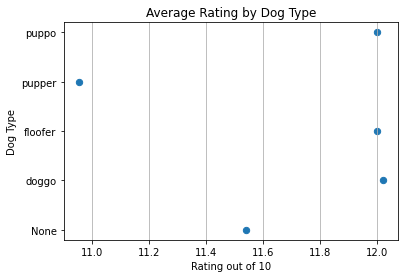

In [451]:
type_ratings.plot(x="rating_numerator",y="dog_type", s=40, kind="scatter")
plt.title("Average Rating by Dog Type")
plt.xlabel("Rating out of 10")
plt.ylabel("Dog Type")
plt.grid(axis= 'x')
plt.show()

### Average Rating by Dog Type Visualization
##### In the above graph, we can see that, based on the average rating given to each dog type in our dataset (looking here only at those dogs with one given dog type), the majority of dog types hover arround a 12/10 rating, while dogs rated as 'puppo'  average a rating of just below 11/10. This is in line with the spirit of the Twitter page and their penchant for rating dogs above 10/10.